In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpecFromSubplotSpec
from drawarrow import ax_arrow

In [2]:
income_inequality_processed = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-08-05/income_inequality_processed.csv')

In [3]:
df = income_inequality_processed.dropna()

In [4]:
df

,Entity,Code,Year,gini_mi_eq,gini_dhi_eq
0,Australia,AUS,1989,0.431,0.304
1,Australia,AUS,1995,0.470,0.311
2,Australia,AUS,2001,0.481,0.320
3,Australia,AUS,2003,0.469,0.316
4,Australia,AUS,2004,0.467,0.316
...,...,...,...,...,...
912,United States,USA,2019,0.505,0.394
913,United States,USA,2020,0.521,0.376
914,United States,USA,2021,0.517,0.371
915,United States,USA,2022,0.512,0.393


# A axes data

In [5]:
dfa = df.dropna()
# Calculate averages by year
dfa = dfa.groupby("Year")[["gini_mi_eq", "gini_dhi_eq"]].mean().reset_index()
# Calculate difference between coefficients
dfa["gini_diff"] = dfa["gini_mi_eq"]- dfa["gini_dhi_eq"]

In [6]:
# Function to return the index of the specific row with max or min values
def min_max(df):    
    min_max = {
        "max_col1": df["gini_mi_eq"].idxmax(),
        "min_col1": df["gini_mi_eq"].idxmin(),
        "max_col2": df["gini_dhi_eq"].idxmax(),
        "min_col2": df["gini_dhi_eq"].idxmin(),
        "max_col3": df["gini_diff"].idxmax(),
        "min_col3": df["gini_diff"].idxmin()
    }
    
    # Create a new df
    result = df.loc[[min_max["max_col1"],  min_max["min_col1"], 
                     min_max["max_col2"],  min_max["min_col2"], 
                     min_max["max_col3"],  min_max["min_col3"]]].reset_index(drop=True)
    
    return result

In [7]:
# Apply function
minmax_df = min_max(dfa)

In [8]:
minmax_df = minmax_df.drop_duplicates().reset_index()

In [9]:
minmax_df

,index,Year,gini_mi_eq,gini_dhi_eq,gini_diff
0,0,2023,0.507000,0.392000,0.115000
1,1,1968,0.332000,0.245000,0.087000
2,4,2020,0.486684,0.311263,0.175421
3,5,1970,0.371000,0.289000,0.082000


# B axes data

In [10]:
# Calculate country averages
df = df.groupby("Entity")[["gini_mi_eq", "gini_dhi_eq"]].mean().reset_index()
# Calculate difference between coefficients
df["gini_diff"] = df["gini_mi_eq"] - df["gini_dhi_eq"]
# Sort values
df = df.sort_values(by="gini_diff", ascending=False)

# Plot

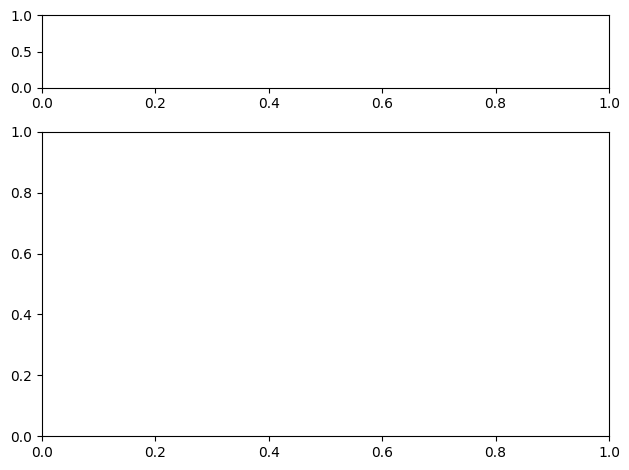

In [11]:
# Mosaic layout
scheme = """
AA
BB
BB
BB
"""
fig, axs = plt.subplot_mosaic(scheme, layout="tight")

plt.show()

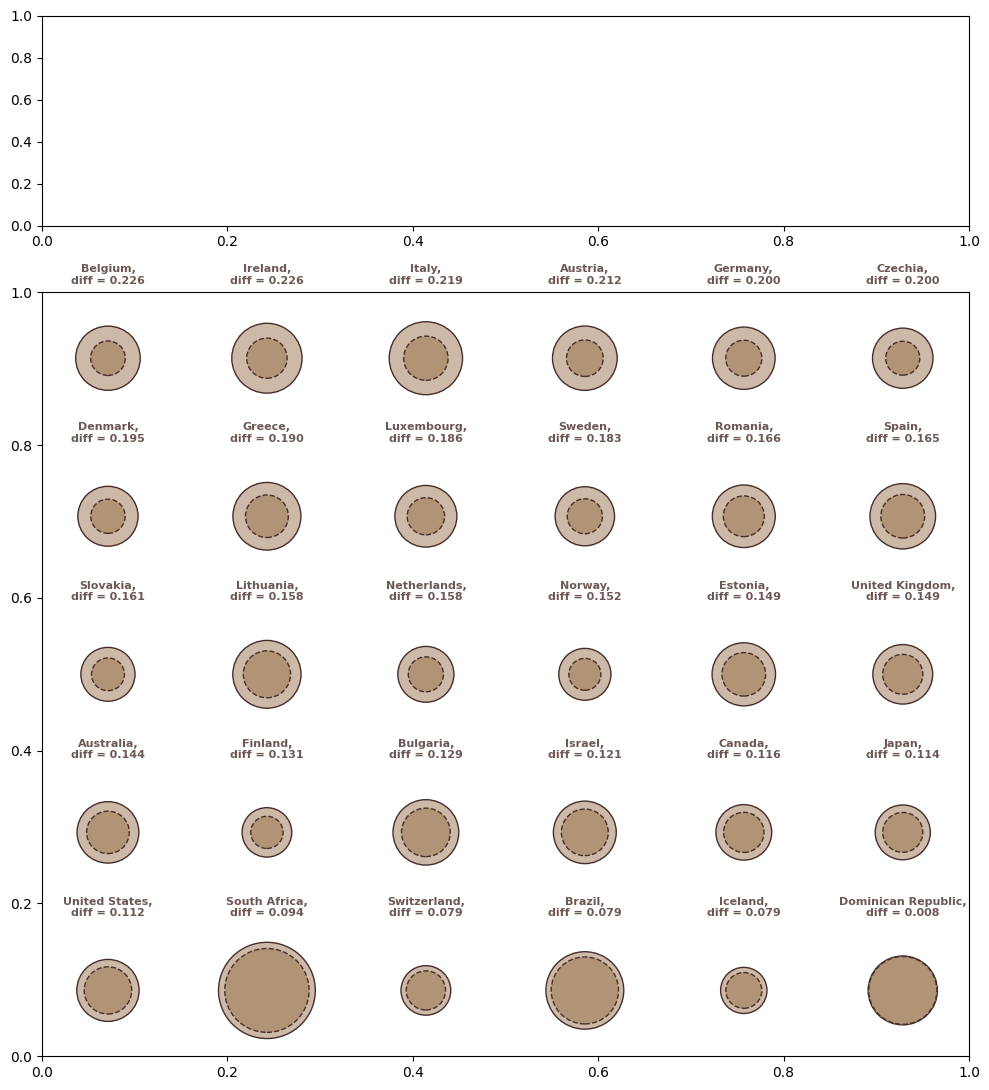

In [12]:
fig, axs = plt.subplot_mosaic(scheme, layout="tight", figsize=(10, 11))

# Subplot area for subplots
outer_ax = axs["B"]

# Create a GridSpec 
gs = GridSpecFromSubplotSpec(5, 6, subplot_spec=outer_ax.get_subplotspec(), wspace=0.2, hspace=0.2)

entities = df["Entity"].unique()
text_style = dict(size=8, weight="bold", color="#482E2A", alpha=0.8)

# B Axes
for i, entity in enumerate(entities):    

    # Create a new axes inside the GridSpec
    ax = fig.add_subplot(gs[i // 6, i % 6])
    # Parameters
    row = df[df["Entity"] == entity].iloc[0]
    col1_radius = row["gini_mi_eq"]
    col2_radius = row["gini_dhi_eq"]
    diff = row["gini_diff"]

    # Draw circles
    circle1 = patches.Circle((0.5, 0.5), radius=col1_radius, facecolor="#cdb9a7", ec="#482E2A")
    circle2 = patches.Circle((0.5, 0.5), radius=col2_radius, facecolor="#B19376", ec="#482E2A", ls="dashed")

    # Add circles
    ax.add_patch(circle1)
    ax.add_patch(circle2) 
    
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'{entity},\ndiff = {diff:.3f}', **text_style)
    ax.axis("off")

plt.show()

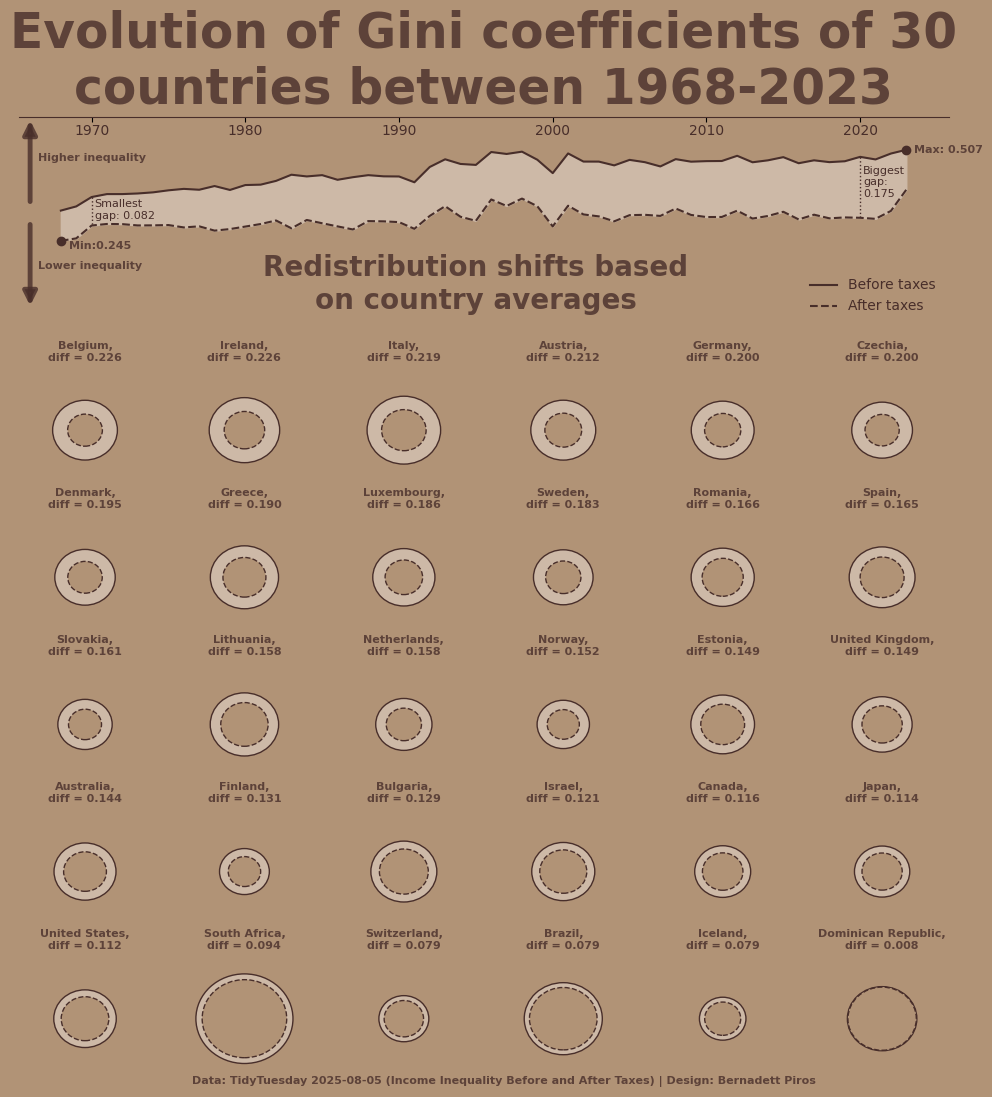

In [13]:
fig, axs = plt.subplot_mosaic(scheme, layout="tight", figsize=(10, 11))

# Subplot area for small multiples
outer_ax = axs["B"]

# Create a GridSpec 
gs = GridSpecFromSubplotSpec(5, 6, subplot_spec=outer_ax.get_subplotspec(), wspace=0.2, hspace=0.2)

entities = df["Entity"].unique()
text_style = dict(size=8, weight="bold", color="#482E2A", alpha=0.8)

# B Axes
for i, entity in enumerate(entities):    

    # Create new axes inside the GridSpec
    ax = fig.add_subplot(gs[i // 6, i % 6])
    # Parametrs
    row = df[df["Entity"] == entity].iloc[0]
    col1_radius = row["gini_mi_eq"]
    col2_radius = row["gini_dhi_eq"]
    diff = row["gini_diff"]

    # Draw circles
    circle1 = patches.Circle((0.5, 0.5), radius=col1_radius, facecolor="#cdb9a7", ec="#482E2A")
    circle2 = patches.Circle((0.5, 0.5), radius=col2_radius, facecolor="#B19376", ec="#482E2A", ls="dashed")

    # Add circles
    ax.add_patch(circle1)
    ax.add_patch(circle2) 

    # Overall theme and style
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'{entity},\ndiff = {diff:.3f}', **text_style)
    ax.set_facecolor("#B19376")
    ax.axis("off")

outer_ax.remove()

# A Axes
axs["A"].plot(dfa["Year"], dfa["gini_mi_eq"], color="#482E2A", label="Before taxes")
axs["A"].plot(dfa["Year"], dfa["gini_dhi_eq"], color="#482E2A", label="After taxes", ls="dashed")
axs["A"].fill_between(dfa["Year"], dfa["gini_mi_eq"], dfa["gini_dhi_eq"], where=(dfa["gini_mi_eq"] > dfa["gini_dhi_eq"]), color="#cdb9a7")

# Annotations
x2_val = minmax_df.loc[2, "Year"]
y2_col1 = minmax_df.loc[2, "gini_mi_eq"]
y2_col2 = minmax_df.loc[2, "gini_dhi_eq"]
axs["A"].plot([x2_val, x2_val], [y2_col1, y2_col2], color="#482E2A", ls="dotted", lw=1)
axs["A"].text(x2_val+0.2, y2_col2+0.06, "Biggest\ngap:\n0.175", color="#482E2A",size=8)

x3_val = minmax_df.loc[3, "Year"]
y3_col1 = minmax_df.loc[3, "gini_mi_eq"]
y3_col2 = minmax_df.loc[3, "gini_dhi_eq"]
axs["A"].plot([x3_val, x3_val], [y3_col1, y3_col2], color="#482E2A", ls="dotted", lw=1)
axs["A"].text(x3_val+0.2, y3_col2+0.02, "Smallest\ngap: 0.082", color="#482E2A", size=8)

x0_val = minmax_df.loc[0, "Year"]
y0_col1 = minmax_df.loc[0, "gini_mi_eq"]
axs["A"].scatter(x0_val, y0_col1, color="#482E2A")
axs["A"].text(x0_val+0.5, y0_col1, "Max: 0.507", **text_style, va="center")

x1_val = minmax_df.loc[1, "Year"]
y1_col2 = minmax_df.loc[1, "gini_dhi_eq"]
axs["A"].scatter(x1_val, y1_col2, color="#482E2A")
axs["A"].text(x1_val+0.5, y1_col2, "Min:0.245", **text_style, va="top")

# Legend
axs["A"].legend(
    facecolor="#B19376",
    edgecolor="#B19376",
    labelcolor="#482E2A",
    loc="lower right")

# Overall theme and style
axs["A"].set_ylim(0, 0.6)
axs["A"].xaxis.tick_top()
axs["A"].tick_params(axis="y", length=0)
axs["A"].tick_params(axis="x", direction="in", pad=-15)
axs["A"].tick_params(axis="both", labelcolor="#482E2A")
axs["A"].yaxis.set_tick_params(labelright=True)
axs["A"].spines[["left", "bottom", "right"]].set_visible(False)
axs["A"].spines[["top"]].set_color("#482E2A")
axs["A"].set_yticks([])
axs["A"].set_facecolor("#B19376")

# Arrows and annotations
ax_arrow(
   tail_position=[1966, 0.35],
   head_position=[1966, 0.6],
   color="#482E2A",   
   alpha=0.8,
   width=3.5,
   fill_head=True,
   ax=axs["A"],
)
axs["A"].text(1966.5, 0.475, "Higher inequality", **text_style)
ax_arrow(
   tail_position=[1966, 0.3],
   head_position=[1966, 0.05],
   color="#482E2A",   
   alpha=0.8,
   width=3.5,
   fill_head=True,
   ax=axs["A"],
)
axs["A"].text(1966.5, 0.165, "Lower inequality", **text_style)

# Texts and fig color
fig.set_facecolor("#B19376")
axs["A"].set_title("Evolution of Gini coefficients of 30\ncountries between 1968-2023", color="#482E2A", weight="bold", alpha=0.8, size=35, pad=10)
axs["A"].text(1995, 0.05,"Redistribution shifts based\non country averages", color="#482E2A", weight="bold", alpha=0.8, size=20, ha="center")
fig.text(0.5, 0.01, "Data: TidyTuesday 2025-08-05 (Income Inequality Before and After Taxes) | Design: Bernadett Piros", **text_style, ha="center")

plt.show()

#fig.savefig("2025-08-05.png", bbox_inches='tight', pad_inches=0.2)